In [18]:
import numpy as np
from torch.utils.data import DataLoader
import torch
from matplotlib import pyplot as plt
import os 
import sys
from torch.cuda.amp import autocast

from utils.data_utils import load_config
from utils.w4c_dataloadernew import RainData 

config = load_config("xrestormer.yaml")

dataset = RainData("validation", **config["dataset"])
print(len(dataset))

|YEARS] ['2019']
720


In [19]:
dataloader = iter(DataLoader(dataset, batch_size=4, shuffle=False))
inp, out, metadata = next(dataloader)


In [20]:
inp.shape, out.shape

(torch.Size([4, 11, 1, 252, 252]), torch.Size([4, 1, 1, 252, 252]))

In [21]:
# make sure inp time and target time is the same
metadata['input']['timestamps'], metadata['target']['timestamps']

([tensor([0, 1, 2, 3])], [tensor([0, 1, 2, 3])])

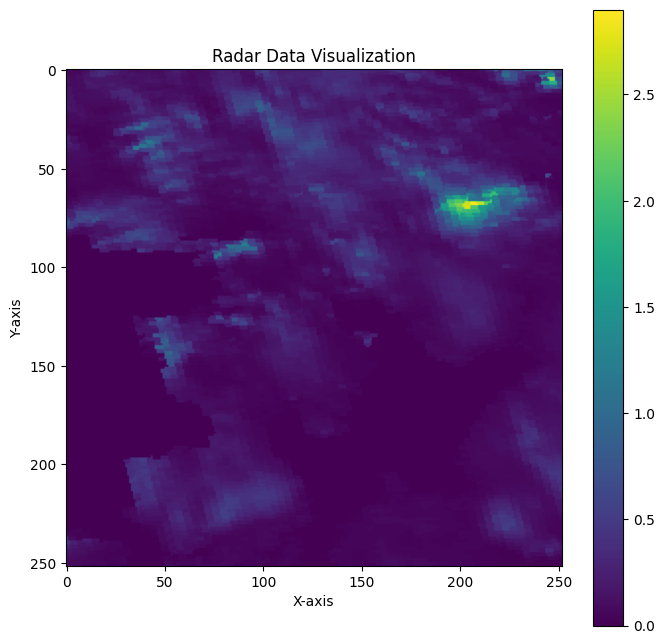

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(out[3,0,0,:,:], cmap='viridis')

plt.colorbar()

plt.title('Radar Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

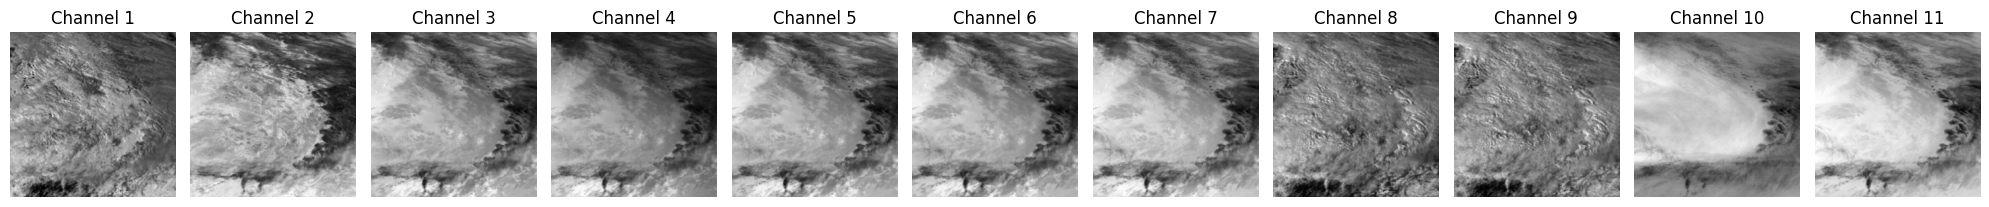

In [23]:
import matplotlib.pyplot as plt
import torch
import numpy as np

batch_index = 0
single_batch = inp[batch_index]
single_batch = single_batch.squeeze(1)  

fig, axes = plt.subplots(1, 11, figsize=(20, 20))
for i in range(11):
    ax = axes[i]
    ax.imshow(single_batch[i], cmap='gray')
    ax.set_title(f'Channel {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()
